#### Data cleaning for ONS Adult smoking habits in Great Britain (Table 1.1 in the data sources Miro table):
##### Table 1a: Proportion of cigarette smokers, by sex and age, Great Britain, 1974 to 2022

In [1]:
#Load the data into a dataframe and view a sample

import pandas as pd

table1a = pd.read_csv("Table_1a-Table 1.csv")

table1a.head()

,Weight \n[note 4],Year \n[note 5],Men \naged \n16 to 24,Men \naged \n25 to 34,Men \naged \n35 to 49,Men \naged \n50 to 59,Men \naged \n60 and over,Men \naged \n16 and over,Women \naged \n16 to 24,Women \naged \n25 to 34,...,Women \naged \n50 to 59,Women \naged \n60 and over,Women \naged \n16 and over,All persons \naged \n16 to 24,All persons \naged \n25 to 34,All persons \naged \n35 to 49,All persons \naged \n50 to 59,All persons \naged \n60 and over,All persons \naged \n16 and over,Unnamed: 20
0,Weighted,2022 [note 11],9.9,14.4,13.7,17.3,9.0,12.5,11.0,13.3,...,12.5,6.8,10.0,10.5,13.8,11.8,14.9,7.9,11.2,NaN
1,Weighted,2021 [note 11],13.5,17.4,16.3,16.1,8.4,13.7,12.7,16.1,...,13.6,7.0,11.7,13.1,16.8,14.8,14.8,7.7,12.7,NaN
2,Weighted,2020 [note 10],15.9,18.4,18.7,16.4,9.8,15.3,14.4,17.9,...,16.1,9.1,13.7,15.2,18.1,16.9,16.3,9.4,14.5,NaN
3,Weighted,2019,20.7,22.8,19.0,21.8,10.4,17.9,15.2,20.8,...,14.6,8.7,13.8,18.3,21.8,16.5,18.4,9.5,15.8,NaN
4,Weighted,2018,28.0,19.1,20.3,14.5,8.8,17.0,18.4,22.3,...,15.8,11.3,16.2,23.6,20.8,18.6,15.2,10.2,16.6,NaN


In [2]:
#Explore the data

#View table size
table1a.shape

#View information on all columns in the dataframe
table1a.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Weight 
[note 4]                36 non-null     object 
 1   Year 
[note 5]                  36 non-null     object 
 2   Men 
aged 
16 to 24             36 non-null     float64
 3   Men 
aged 
25 to 34             36 non-null     float64
 4   Men 
aged 
35 to 49             36 non-null     float64
 5   Men 
aged 
50 to 59             36 non-null     float64
 6   Men 
aged 
60 and over          36 non-null     float64
 7   Men 
aged 
16 and over          36 non-null     float64
 8   Women 
aged 
16 to 24           36 non-null     float64
 9   Women 
aged 
25 to 34           36 non-null     float64
 10  Women 
aged 
35 to 49           36 non-null     float64
 11  Women 
aged 
50 to 59           36 non-null     float64
 12  Women 
aged 
60 and over        36 non

In [3]:
#Check the column names 
sorted(table1a)

# We can see column 20 is an unnamed blank column. Drop this column
table1a.drop(table1a.columns[table1a.columns.str.contains('Unnamed')], axis=1, inplace=True)

#Check column dropped
sorted(table1a)


['All persons \naged \n16 and over',
 'All persons \naged \n16 to 24',
 'All persons \naged \n25 to 34',
 'All persons \naged \n35 to 49',
 'All persons \naged \n50 to 59',
 'All persons \naged \n60 and over',
 'Men \naged \n16 and over',
 'Men \naged \n16 to 24',
 'Men \naged \n25 to 34',
 'Men \naged \n35 to 49',
 'Men \naged \n50 to 59',
 'Men \naged \n60 and over',
 'Weight \n[note 4]',
 'Women \naged \n16 and over',
 'Women \naged \n16 to 24',
 'Women \naged \n25 to 34',
 'Women \naged \n35 to 49',
 'Women \naged \n50 to 59',
 'Women \naged \n60 and over',
 'Year \n[note 5]']

In [4]:
#Many of the column names are long, rename them to shorter names
#View columns in order first 

table1a.columns

table1a.columns = ["Weight", "Year", "Men 16-24", "Men 25-34", "Men 35-49", "Men 50-59", "Men 60+", "All men 16+",
                  "Women 16-14", "Women 25-34", "Women 35-49", "Women 50-59", "Women 60+", "All women 16+",
                  "All 16-24", "All 25-34", "All 35-49", "All 50-59", "All 60+", "All 16+"]
table1a.head()

,Weight,Year,Men 16-24,Men 25-34,Men 35-49,Men 50-59,Men 60+,All men 16+,Women 16-14,Women 25-34,Women 35-49,Women 50-59,Women 60+,All women 16+,All 16-24,All 25-34,All 35-49,All 50-59,All 60+,All 16+
0,Weighted,2022 [note 11],9.9,14.4,13.7,17.3,9.0,12.5,11.0,13.3,10.0,12.5,6.8,10.0,10.5,13.8,11.8,14.9,7.9,11.2
1,Weighted,2021 [note 11],13.5,17.4,16.3,16.1,8.4,13.7,12.7,16.1,13.3,13.6,7.0,11.7,13.1,16.8,14.8,14.8,7.7,12.7
2,Weighted,2020 [note 10],15.9,18.4,18.7,16.4,9.8,15.3,14.4,17.9,15.1,16.1,9.1,13.7,15.2,18.1,16.9,16.3,9.4,14.5
3,Weighted,2019,20.7,22.8,19.0,21.8,10.4,17.9,15.2,20.8,14.3,14.6,8.7,13.8,18.3,21.8,16.5,18.4,9.5,15.8
4,Weighted,2018,28.0,19.1,20.3,14.5,8.8,17.0,18.4,22.3,16.9,15.8,11.3,16.2,23.6,20.8,18.6,15.2,10.2,16.6


In [5]:
#The 'Year' column refers to notes, remove these so that the column just shows year values

#import regex
import re

#Use regex extract to set the values to a string beginning with four digits
table1a['Year'] = table1a['Year'].str.extract(r'^(\d{4})', expand=False)

#Check the column now only shows the year values
table1a['Year']


0     2022
1     2021
2     2020
3     2019
4     2018
5     2017
6     2016
7     2015
8     2014
9     2013
10    2012
11    2011
12    2010
13    2009
14    2008
15    2007
16    2006
17    2005
18    2004
19    2003
20    2002
21    2001
22    2000
23    1998
24    1996
25    1994
26    1992
27    1990
28    1988
29    1986
30    1984
31    1982
32    1980
33    1978
34    1976
35    1974
Name: Year, dtype: object

In [6]:
#Check for missing values

missing = table1a.isnull().sum()
print(missing)

#No missing values, no further action needed

Weight           0
Year             0
Men 16-24        0
Men 25-34        0
Men 35-49        0
Men 50-59        0
Men 60+          0
All men 16+      0
Women 16-14      0
Women 25-34      0
Women 35-49      0
Women 50-59      0
Women 60+        0
All women 16+    0
All 16-24        0
All 25-34        0
All 35-49        0
All 50-59        0
All 60+          0
All 16+          0
dtype: int64


In [7]:
#Check for duplicates

duplicates = table1a.duplicated().sum()
print(duplicates)

#No duplicates, no further action needed. In this dataset, duplicates would not be removed, but should be considered. 

0


In [7]:
#Normalise data types 

#Check data types 
table1a.dtypes

#All the columns showing proportion are float data type, which is correct.
#After our filtering we need to change the 'Year' column to int data type
table1a['Year'] = table1a['Year'].astype('int64')

#Check
table1a.dtypes


Weight            object
Year               int64
Men 16-24        float64
Men 25-34        float64
Men 35-49        float64
Men 50-59        float64
Men 60+          float64
All men 16+      float64
Women 16-14      float64
Women 25-34      float64
Women 35-49      float64
Women 50-59      float64
Women 60+        float64
All women 16+    float64
All 16-24        float64
All 25-34        float64
All 35-49        float64
All 50-59        float64
All 60+          float64
All 16+          float64
dtype: object

In [8]:
#Explore the proportional numeric data

table1a.describe()

#.describe() for the whole table is overwhelming - view summary statistics just for total men, total women, and all people (over 16)
table1a[["All men 16+", "All women 16+", "All 16+"]].describe()

# The mean values sit closer to the minimum than the max, meaning there may be some outliers, however this is aggregating the proportion of smokers
# over time so we can expect some variance where proportions can have steep changes. The proportion of women is lower overall, bringing the average
# proportion of smokers of the total population down from the male figures.


,All men 16+,All women 16+,All 16+
count,36.000000,36.000000,36.000000
mean,26.713889,23.469444,25.005556
std,9.291783,7.857001,8.457961
min,12.500000,10.000000,11.200000
25%,20.775000,17.100000,19.100000
50%,25.850000,22.850000,24.250000
75%,29.800000,27.975000,28.800000
max,51.400000,40.700000,45.600000


In [9]:
#We can explore the numbers further to remove outliers using IQR - Funmi's code:

def remove_outliers_iqr(df):
    # Select numeric columns
    numeric_cols = table1a.select_dtypes(include=['number']).columns

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = table1a[numeric_cols].quantile(0.25)
    Q3 = table1a[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those lying outside 1.5 * IQR from Q1 and Q3
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    outliers_removed = table1a[~((table1a[numeric_cols] < lower_bound) | (table1a[numeric_cols] > upper_bound)).any(axis=1)]
    return outliers_removed

# Apply to remove outliers
table1a_cleaned = remove_outliers_iqr(table1a)

print("Dataset after removing outliers:")
table1a_cleaned.head()


Dataset after removing outliers:


,Weight,Year,Men 16-24,Men 25-34,Men 35-49,Men 50-59,Men 60+,All men 16+,Women 16-14,Women 25-34,Women 35-49,Women 50-59,Women 60+,All women 16+,All 16-24,All 25-34,All 35-49,All 50-59,All 60+,All 16+
0,Weighted,2022,9.9,14.4,13.7,17.3,9.0,12.5,11.0,13.3,10.0,12.5,6.8,10.0,10.5,13.8,11.8,14.9,7.9,11.2
1,Weighted,2021,13.5,17.4,16.3,16.1,8.4,13.7,12.7,16.1,13.3,13.6,7.0,11.7,13.1,16.8,14.8,14.8,7.7,12.7
2,Weighted,2020,15.9,18.4,18.7,16.4,9.8,15.3,14.4,17.9,15.1,16.1,9.1,13.7,15.2,18.1,16.9,16.3,9.4,14.5
3,Weighted,2019,20.7,22.8,19.0,21.8,10.4,17.9,15.2,20.8,14.3,14.6,8.7,13.8,18.3,21.8,16.5,18.4,9.5,15.8
4,Weighted,2018,28.0,19.1,20.3,14.5,8.8,17.0,18.4,22.3,16.9,15.8,11.3,16.2,23.6,20.8,18.6,15.2,10.2,16.6


In [14]:
#Check to see if this has altered the shape, or resulted in any missing values
# print(table1a_cleaned.isnull().sum())
# print(table1a.shape)
# print(table1a_cleaned.shape)

#The IQR cleaned data has removed 5 rows. View the tail to see if these are at the bottom
table1a.tail()
table1a_cleaned.tail()

#The IQR cleaning has removed the years 1974 - 1982 (5 rows). We can see that this is due to smoking rates skewing disproportionately higher
#in these earlier years, but this is expected. For now we will continue with the data without the IQR cleaning. 

,Weight,Year,Men 16-24,Men 25-34,Men 35-49,Men 50-59,Men 60+,All men 16+,Women 16-14,Women 25-34,Women 35-49,Women 50-59,Women 60+,All women 16+,All 16-24,All 25-34,All 35-49,All 50-59,All 60+,All 16+
31,Unweighted,1982,35.8,40.2,40.2,41.6,32.8,37.8,35.0,36.8,37.8,39.9,23.1,33.1,35.4,38.4,38.9,40.7,27.2,35.3
32,Unweighted,1980,38.3,47.3,45.4,46.7,35.6,42.4,36.5,44.0,42.6,43.8,24.0,36.8,37.4,45.6,43.9,45.1,28.8,39.4
33,Unweighted,1978,40.1,48.4,48.0,47.7,38.3,44.5,38.2,42.4,42.7,42.3,24.0,36.6,39.1,45.3,45.3,44.9,29.9,40.2
34,Unweighted,1976,42.8,48.2,50.5,49.9,39.8,46.2,40.2,42.9,45.3,46.0,24.0,38.0,41.5,45.4,47.8,47.8,30.5,41.8
35,Unweighted,1974,47.4,55.1,55.3,52.8,44.5,51.4,41.3,46.9,49.0,48.2,25.5,40.7,44.3,50.9,52.0,50.4,33.3,45.6


In [16]:
#We can filter to look at values at the higher and lower end to see where they lie:
table1a[table1a['All 16+'] > 40]
#The higher values are in the 1970s, as expected.

table1a[table1a['All 16+'] < 15]
#The lower values are in the 2020s, as expected. 

,Weight,Year,Men 16-24,Men 25-34,Men 35-49,Men 50-59,Men 60+,All men 16+,Women 16-14,Women 25-34,Women 35-49,Women 50-59,Women 60+,All women 16+,All 16-24,All 25-34,All 35-49,All 50-59,All 60+,All 16+
0,Weighted,2022,9.9,14.4,13.7,17.3,9.0,12.5,11.0,13.3,10.0,12.5,6.8,10.0,10.5,13.8,11.8,14.9,7.9,11.2
1,Weighted,2021,13.5,17.4,16.3,16.1,8.4,13.7,12.7,16.1,13.3,13.6,7.0,11.7,13.1,16.8,14.8,14.8,7.7,12.7
2,Weighted,2020,15.9,18.4,18.7,16.4,9.8,15.3,14.4,17.9,15.1,16.1,9.1,13.7,15.2,18.1,16.9,16.3,9.4,14.5


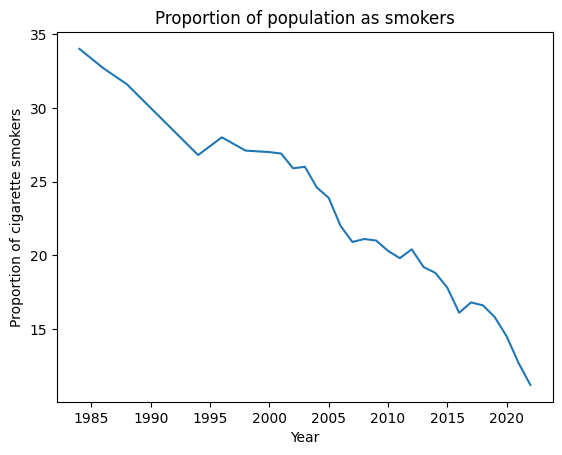

In [24]:
#Test visualisations to view the data to assess its quality

import matplotlib.pyplot as plt

#Total smokers over time
year = table1a['Year']
total_proportion = table1a['All 16+']

plt.plot(year, total_proportion)

plt.xlabel("Year")
plt.ylabel("Proportion of cigarette smokers")
plt.title("Proportion of population as smokers")

plt.show()

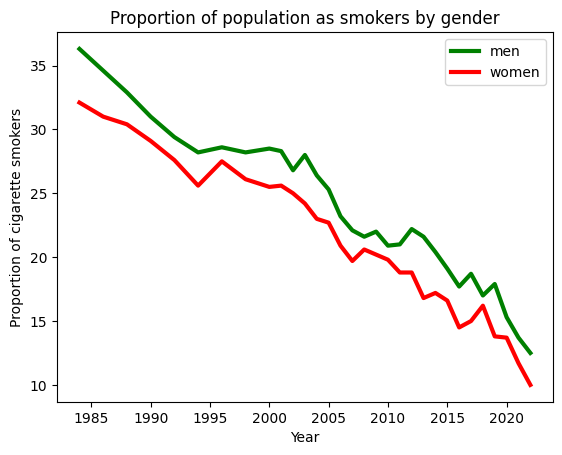

In [15]:
#Smokers by gender over time

men = table1a['All men 16+']
women = table1a['All women 16+']

plt.plot(year, men, 'g', label='men', linewidth=3)
plt.plot(year, women, 'r', label='women', linewidth=3)

plt.xlabel("Year")
plt.ylabel("Proportion of cigarette smokers")
plt.title("Proportion of population as smokers by gender")

plt.legend()
plt.show()

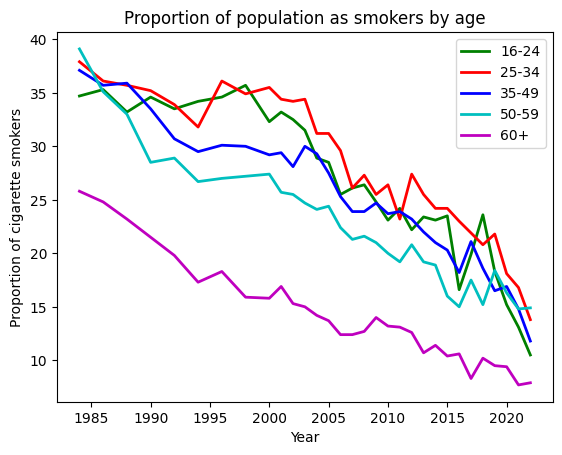

In [16]:
#Smokers by age over time

age1 = table1a['All 16-24']
age2 = table1a['All 25-34']
age3 = table1a['All 35-49']
age4 = table1a['All 50-59']
age5 = table1a['All 60+']

plt.plot(year, age1, 'g', label='16-24', linewidth=2)
plt.plot(year, age2, 'r', label='25-34', linewidth=2)
plt.plot(year, age3, 'b', label='35-49', linewidth=2)
plt.plot(year, age4, 'c', label='50-59', linewidth=2)
plt.plot(year, age5, 'm', label='60+', linewidth=2)

plt.xlabel("Year")
plt.ylabel("Proportion of cigarette smokers")
plt.title("Proportion of population as smokers by age")

plt.legend()
plt.show()


From initial visualisation, the data appears cleaned and accurate. xticks for 'year' will need to be adjusted to show the data more accurately.

#### **Caveat: Prior to the year 2000 (1974-2000) the data is only recorded for every two years e.g. 1974, 1976, 1978.**

This means that the plot line is 'smoother' before the year 2000 as it has less data points. Can we do some work to the data to account for these gaps? 




**Funmi's code has removed pre-1985? Look into*****

In [17]:
#Write the cleaned data to a new csv 
# table1a.to_csv('/table_1.1_cleaned.csv', encoding='utf-8')